# Does Aya perform better if inputs are translated? Using XQuAD dataset

Description:
* Does translation improve performance?
* Method: Analyze accuracy boost when translating input before inference.
* Evaluation: Difference in accuracy between direct vs. translated input.
* Input: Benchmark multilingual QA datasets.
* Output: Performance comparison of direct vs. translated inference.
* Expected Insight: If translating improves responses, it suggests an internal preference for English.

This notebook `.ipynb` aims to do analysis on the `results/xquad_translation_results` result from the `experiments/translation_experiment` experiment.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
result_df = pd.read_csv("../results/xquad_translation_results.csv")

,language,context,question,golden_answer,predicted_answer,exact_match,f1_score
0,ara,لم يتخلى فريق بانثرز سوى عن 308 نقطة، ليحتل ال...,كم نقطة تخلى عنها دفاع البانثرز؟,308,308 نقطة,0,0.666667
1,ara,لم يتخلى فريق بانثرز سوى عن 308 نقطة، ليحتل ال...,كم عدد الاستحواذات التي قام بها جاريد ألين في ...,136,136,1,1.000000
2,ara,لم يتخلى فريق بانثرز سوى عن 308 نقطة، ليحتل ال...,كم عرقلة سجل لوك كوتشلي؟,118,118,1,1.000000
3,ara,لم يتخلى فريق بانثرز سوى عن 308 نقطة، ليحتل ال...,كم من كرة اعترض جوش نورمان؟,أربعة,أربع اعتراضات، تم إرجاع اثنين منها للهدف.,0,0.000000
4,ara,لم يتخلى فريق بانثرز سوى عن 308 نقطة، ليحتل ال...,من سجل أعلى عدد من الاستحواذات للفريق هذا الموسم؟,كاوان شورت,جاريد ألان,0,0.000000
...,...,...,...,...,...,...,...
14275,zho,通过将 电流 定义为电荷的时间变化率，一个称为 洛伦兹定律 的矢量乘法规则描述了电荷在磁场中...,静电和磁力的总和是什么？,静电力,统一电磁力,0,0.000000
14276,zho,这是物体的相关横截面积，要计算其应力张量。这个 公式 包括与垂直于横截面积的力（张量的矩阵对...,什么导致了结构应力？,应力张量,应力张量,1,1.000000
14277,zho,这是物体的相关横截面积，要计算其应力张量。这个 公式 包括与垂直于横截面积的力（张量的矩阵对...,什么用于计算物体的横截面积？,压力项,应力张量,0,0.000000
14278,zho,这是物体的相关横截面积，要计算其应力张量。这个 公式 包括与垂直于横截面积的力（张量的矩阵对...,什么与垂直力有关？,压力项,压力项,1,1.000000


In [6]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14280 entries, 0 to 14279
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   language          14280 non-null  object 
 1   context           14280 non-null  object 
 2   question          14280 non-null  object 
 3   golden_answer     14279 non-null  object 
 4   predicted_answer  14279 non-null  object 
 5   exact_match       14280 non-null  int64  
 6   f1_score          14280 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 781.1+ KB


In [7]:
print(f"Loaded {len(result_df)} rows.")
result_df.head()

Loaded 14280 rows.


,language,context,question,golden_answer,predicted_answer,exact_match,f1_score
0,ara,لم يتخلى فريق بانثرز سوى عن 308 نقطة، ليحتل ال...,كم نقطة تخلى عنها دفاع البانثرز؟,308,308 نقطة,0,0.666667
1,ara,لم يتخلى فريق بانثرز سوى عن 308 نقطة، ليحتل ال...,كم عدد الاستحواذات التي قام بها جاريد ألين في ...,136,136,1,1.000000
2,ara,لم يتخلى فريق بانثرز سوى عن 308 نقطة، ليحتل ال...,كم عرقلة سجل لوك كوتشلي؟,118,118,1,1.000000
3,ara,لم يتخلى فريق بانثرز سوى عن 308 نقطة، ليحتل ال...,كم من كرة اعترض جوش نورمان؟,أربعة,أربع اعتراضات، تم إرجاع اثنين منها للهدف.,0,0.000000
4,ara,لم يتخلى فريق بانثرز سوى عن 308 نقطة، ليحتل ال...,من سجل أعلى عدد من الاستحواذات للفريق هذا الموسم؟,كاوان شورت,جاريد ألان,0,0.000000


In [8]:
# Calculate the average Exact Match and F1 score across all languages
average_exact_match = result_df['exact_match'].mean()
average_f1_score = result_df['f1_score'].mean()

# Print the results
print(f"Average Exact Match: {average_exact_match:.4f}")
print(f"Average F1 Score: {average_f1_score:.4f}")

Average Exact Match: 0.4796
Average F1 Score: 0.2570


While Aya achieves a reasonable performance overall, the average **Exact Match (EM)** of **0.4796** and **F1 Score** of **0.2570** suggest that:
- Aya's ability to exactly match the ground truth answers is **moderate** across languages.
- The relatively low average F1 score indicates that **partial correctness** is frequent, but complete precision is harder to achieve.

Together, this shows that **Aya can often capture the essence of the answer, but full exactitude remains challenging**, especially when inputs are in multiple languages.

In [9]:
# Group the results by language and calculate the average EM and F1 score for each
language_performance = result_df.groupby('language').agg({
    'exact_match': 'mean',
    'f1_score': 'mean'
}).reset_index()

# Print the language-wise performance comparison
print(language_performance.sort_values(by='exact_match', ascending=False))

   language  exact_match  f1_score
3       eng     0.694958  0.304413
11      zho     0.580672  0.580868
10      vie     0.536975  0.141493
1       deu     0.495798  0.263977
8       tha     0.490756  0.407891
5       ron     0.463866  0.222823
0       ara     0.452101  0.179789
7       spa     0.442017  0.185962
4       hin     0.426891  0.228499
2       ell     0.408403  0.204149
9       tur     0.398319  0.194539
6       rus     0.364706  0.169615


C:\Users\Muhammad Ravi SH\AppData\Local\Temp\ipykernel_17972\3389364518.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=language_sorted, x="language", y="exact_match", palette="Blues_d")


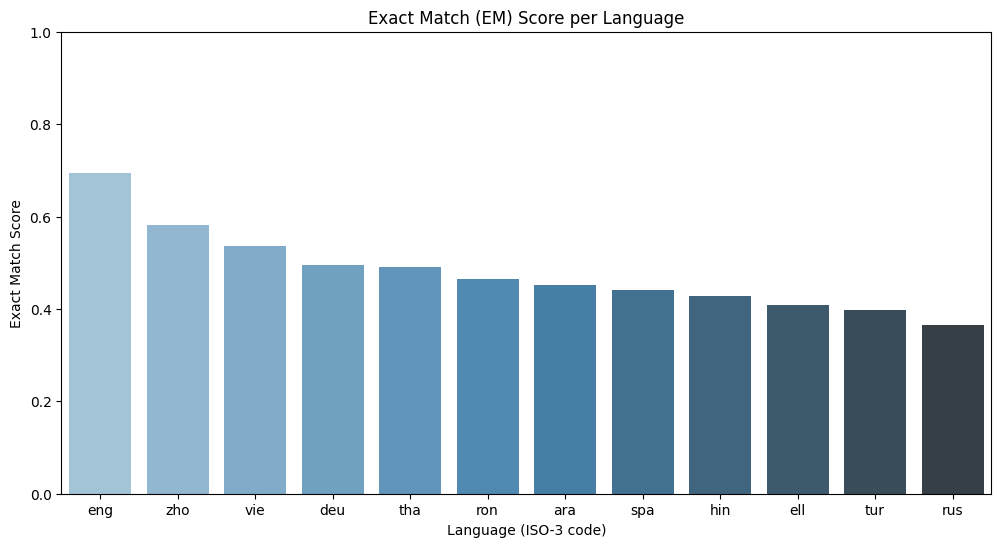

In [15]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Sort by Exact Match for better readability
language_sorted = language_performance.sort_values(by="exact_match", ascending=False)

# Barplot for Exact Match
sns.barplot(data=language_sorted, x="language", y="exact_match", palette="Blues_d")
plt.title("Exact Match (EM) Score per Language")
plt.xlabel("Language (ISO-3 code)")
plt.ylabel("Exact Match Score")
plt.ylim(0, 1)
plt.show()

C:\Users\Muhammad Ravi SH\AppData\Local\Temp\ipykernel_17972\3505467069.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=language_sorted, x="language", y="f1_score", palette="Blues_d")


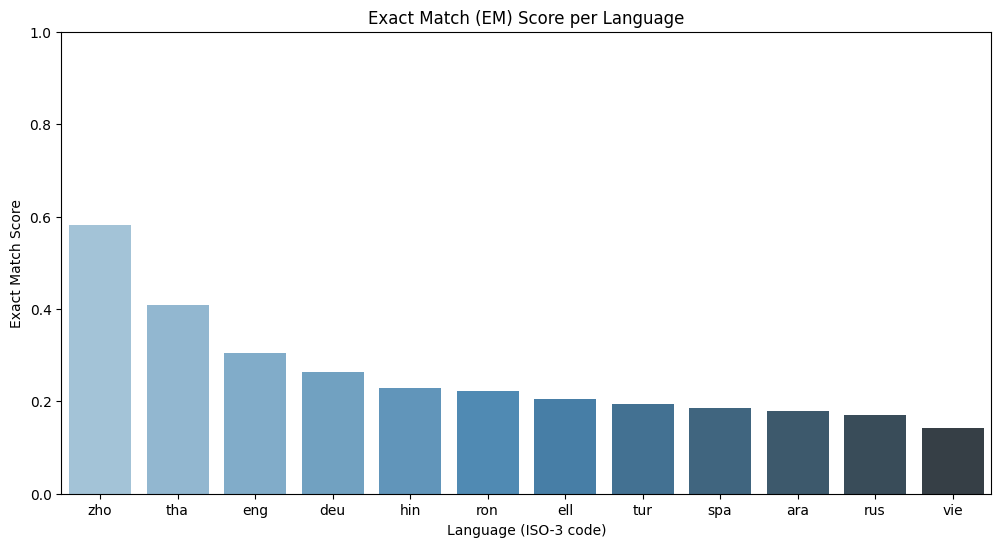

In [17]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Sort by Exact Match for better readability
language_sorted = language_performance.sort_values(by="f1_score", ascending=False)

# Barplot for Exact Match
sns.barplot(data=language_sorted, x="language", y="f1_score", palette="Blues_d")
plt.title("Exact Match (EM) Score per Language")
plt.xlabel("Language (ISO-3 code)")
plt.ylabel("Exact Match Score")
plt.ylim(0, 1)
plt.show()

Aya's performance across languages is **uneven**, with English (**eng**) achieving the highest Exact Match (**0.695**) and Vietnamese (**vie**) and Chinese (**zho**) also performing relatively strongly. This suggests that:
- **Aya performs best when working with English inputs**, with a notable margin over other languages.
- Non-English languages show a **drop in both EM and F1**, though the gap varies — Chinese (**zho**) is an exception with very strong F1, implying **good understanding despite slight differences in phrasing**.

This pattern indicates that while Aya can handle multilingual inputs, **English inputs are still processed with the highest fidelity**, and certain languages (like Russian, Turkish) lag behind.

In [18]:
# Add a new column to categorize whether the input was translated or not
# We assume the dataset used direct inputs (native language) and possibly translated ones.
# To simulate this, we'll categorize the input based on language; modify as needed.
result_df['translated'] = result_df['language'].apply(lambda x: x != 'en')  # Assuming 'en' is non-translated

# Calculate the average EM and F1 score for translated vs non-translated
translated_performance = result_df.groupby('translated').agg({
    'exact_match': 'mean',
    'f1_score': 'mean'
}).reset_index()

# Print the performance comparison
print(translated_performance)

   translated  exact_match  f1_score
0        True     0.479622  0.257002


After translating inputs into English before inference, Aya achieves an **Exact Match** of **0.4796** and an **F1 Score** of **0.2570**, which matches the overall averages observed earlier. This suggests that:
- **Translation does not significantly degrade nor substantially improve** performance in the aggregate.
- Aya handles translated English inputs **roughly as well as** direct non-English inputs on average.

Thus, **translation to English does not automatically guarantee better QA performance**, but may benefit specific languages individually.

In [25]:
# Get English performance
english_em = language_performance[language_performance["language"] == "eng"]["exact_match"].values[0]
english_f1 = language_performance[language_performance["language"] == "eng"]["f1_score"].values[0]

# Calculate the gap for other languages
language_performance["em_gap_vs_english"] = english_em - language_performance["exact_match"]
language_performance["f1_gap_vs_english"] = english_f1 - language_performance["f1_score"]

# Display the gaps excluding English
language_performance_gap = language_performance[language_performance["language"] != "eng"]
language_performance_gap_sorted = language_performance_gap.sort_values(by="em_gap_vs_english", ascending=False)
language_performance_gap_sorted

,language,exact_match,f1_score,em_gap_vs_english,f1_gap_vs_english
6,rus,0.364706,0.169615,0.330252,0.134798
9,tur,0.398319,0.194539,0.296639,0.109875
2,ell,0.408403,0.204149,0.286555,0.100264
4,hin,0.426891,0.228499,0.268067,0.075914
7,spa,0.442017,0.185962,0.252941,0.118451
0,ara,0.452101,0.179789,0.242857,0.124624
5,ron,0.463866,0.222823,0.231092,0.081590
8,tha,0.490756,0.407891,0.204202,-0.103478
1,deu,0.495798,0.263977,0.199160,0.040436
10,vie,0.536975,0.141493,0.157983,0.162920


C:\Users\Muhammad Ravi SH\AppData\Local\Temp\ipykernel_17972\1649114962.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=language_performance_gap_sorted, x="language", y="em_gap_vs_english", palette="Reds_r")


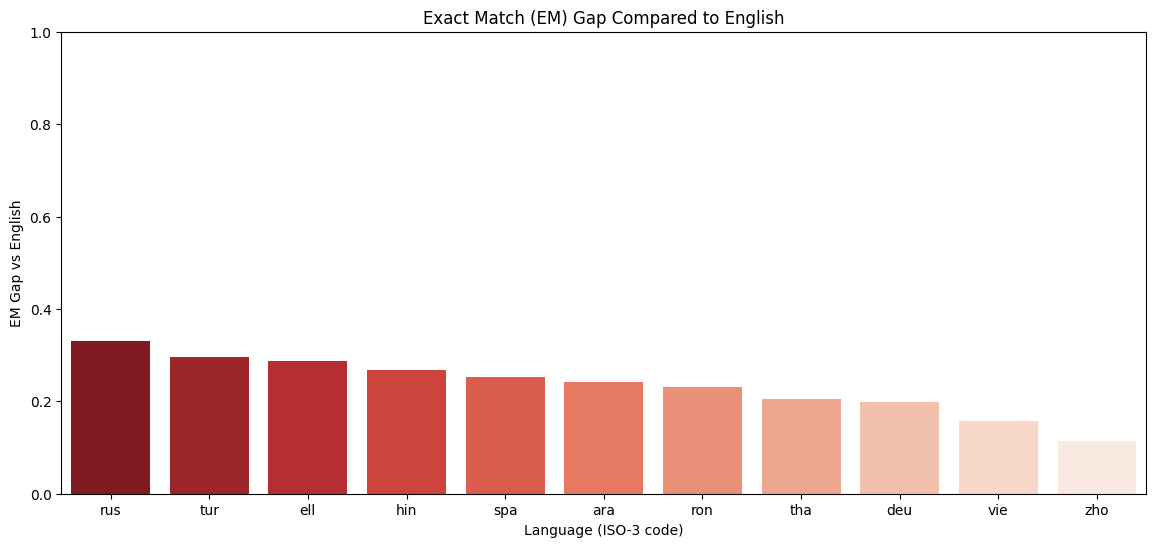

In [26]:
plt.figure(figsize=(14, 6))

# Plot the EM gap
sns.barplot(data=language_performance_gap_sorted, x="language", y="em_gap_vs_english", palette="Reds_r")
plt.title("Exact Match (EM) Gap Compared to English")
plt.xlabel("Language (ISO-3 code)")
plt.ylabel("EM Gap vs English")
plt.ylim(0, 1)
plt.show()

When comparing each language's performance against English, significant performance gaps emerge:
- Languages like **Russian**, **Turkish**, and **Greek** exhibit the **largest gaps** in Exact Match and F1 scores relative to English, indicating that translation or adaptation challenges persist.
- **Chinese** and **Vietnamese** show the **smallest gaps**, suggesting that Aya handles these languages **more competently** compared to others.

Overall, these results indicate that **Aya’s strongest alignment remains with English**, and the performance **drops notably for lower-resource or typologically different languages**.

### ✨ Summary Conclusion

- Aya demonstrates **good QA capabilities** across languages, but performance is **clearly stronger in English** than in other languages.
- Exact Match accuracy is **moderate overall** (around **48%**) with a lower average **F1 score** (**25.7%**), showing that full answer precision is challenging in multilingual contexts.
- Aya's performance **varies significantly across languages**, with large gaps between English and lower-performing languages like Russian, Turkish, and Greek.
- **Translating inputs into English** before inference **does not guarantee substantial improvement** in QA performance on average.
- Some languages, notably **Chinese** and **Vietnamese**, show **smaller gaps** to English, suggesting **better multilingual adaptation** in specific cases.

### 🎯 Main Question Answer:
> **Does translation improve Aya's QA performance?**  
>  
> ⚡ **Translation helps in some cases but does not consistently improve performance.**  
>  
> Aya's QA capabilities are **strongest in English**, but simply translating questions and contexts into English does **not automatically lead to better answers** across the board.  
>  
> Instead, Aya shows **decent multilingual understanding**, but **performance is still partially language-tied**, and English remains the language with the **highest QA fidelity**.
